right now, this compares 9 channel CNN vs. GLMs, in terms of raw performance (cc^2 or cc), on ALL neurons (so no subset stuff yet)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from collections import OrderedDict
from itertools import product
import h5py
import numpy as np
import pandas as pd

In [3]:
from tang_jcompneuro.model_fitting_postprocess import load_model_performance

In [4]:
def check_all():
    subsets_to_check = ('all',
#                         'OT'
                       )
    datasets_to_check = ('MkA_Shape',
#                          'MkE2_Shape'
                        )
    
    models_to_examine = [
        ('cnn', 'b.9'),
        ('cnn', 'b.9_avg'),
        ('cnn', 'b.9_halfsq'),
        ('cnn', 'b.9_avg_halfsq'),
        ('cnn', 'b.9_sq'),
        ('cnn', 'b.9_avg_sq'),
        ('cnn', 'b.9_linear'),
        ('cnn', 'b.9_avg_linear'),
        ('cnn', 'b.9@0.05'),
        ('cnn', 'b.9_avg@0.05'),
        ('cnn', 'b.9_halfsq@0.05'),
        ('cnn', 'b.9_avg_halfsq@0.05'),
        ('cnn', 'b.9_sq@0.05'),
        ('cnn', 'b.9_avg_sq@0.05'),
        ('cnn', 'b.9_linear@0.05'),
        ('cnn', 'b.9_avg_linear@0.05'),
        ('cnn', 'b.9_avg_abs@0.05'),
        ('cnn', 'b.9_abs@0.05'),
        ('cnn', 'b.9@0.005'),
        ('cnn', 'b.9_avg@0.005'),
        ('cnn', 'b.9_halfsq@0.005'),
        ('cnn', 'b.9_avg_halfsq@0.005'),
        ('cnn', 'b.9_sq@0.005'),
        ('cnn', 'b.9_avg_sq@0.005'),
        ('cnn', 'b.9_linear@0.005'),
        ('cnn', 'b.9_avg_linear@0.005'),
        ('cnn', 'b.9_avg_abs@0.005'),
        ('cnn', 'b.9_abs@0.005'),
    ] # TODO should make this a ordered dict.
      # so that it will be easier to collect best val model for each model class.
    
    score_all = []
    for dataset, subset in product(datasets_to_check, subsets_to_check):
        
        print(dataset, subset)
        for (model_type, model_subtype) in models_to_examine: 
            score_new_cc = np.asarray(
                [load_model_performance(dataset, subset, 100, s, model_type, model_subtype)['corr'] for s in range(1)]
            ).mean(axis=0)
            
            score_new_cc2 = np.asarray(
                [load_model_performance(dataset, subset, 100, s, model_type, model_subtype)['corr']**2 for s in range(1)]
            ).mean(axis=0)
            
            if '@' in model_subtype:
                model_subtype_base, hack_ratio = model_subtype.split('@')
                hack_ratio = float(hack_ratio)
            else:
                model_subtype_base= model_subtype
                hack_ratio = 1
            
            score_all.append({
                'dataset': dataset,
                'subset': subset,
                'model': model_type + '_' + model_subtype_base,
                'hack_ratio': hack_ratio,
                'cc': score_new_cc.mean(),
                'cc2': score_new_cc2.mean(),
                'raw_cc': score_new_cc.copy(),
                # later on, I can add neuron subset, etc.
            })
            
    score_all = pd.DataFrame(score_all,
                             columns = ['dataset', 'subset', 'model',
                                        'hack_ratio', 'cc', 'cc2', 'raw_cc']).set_index(['dataset', 'subset', 'model', 'hack_ratio'], verify_integrity=True)
    return score_all

In [5]:
df_all = check_all()

MkA_Shape all


In [6]:
df_all.columns.name = 'metric'

In [7]:
# this is the way to change a multiindex's names.
# df_all.index.rename(['haha','haha2','haha3'], inplace=True)

In [8]:
df_to_process = df_all.unstack('subset').unstack('hack_ratio')
df_to_process = df_to_process.xs('MkA_Shape', level='dataset')
df_to_process

metric                    cc                           cc2            \
subset                   all                           all             
hack_ratio             0.005     0.050     1.000     0.005     0.050   
model                                                                  
cnn_b.9             0.437554  0.437631  0.431644  0.224485  0.224521   
cnn_b.9_abs         0.407255  0.408091       NaN  0.194604  0.195364   
cnn_b.9_avg         0.409435  0.410495  0.415119  0.199818  0.200389   
cnn_b.9_avg_abs     0.404336  0.406273       NaN  0.193620  0.194944   
cnn_b.9_avg_halfsq  0.297291  0.360893  0.412280  0.147316  0.175703   
cnn_b.9_avg_linear  0.217314  0.217389  0.218611  0.061621  0.061620   
cnn_b.9_avg_sq      0.370056  0.371031  0.381723  0.165062  0.165890   
cnn_b.9_halfsq      0.380948  0.415499  0.435210  0.190018  0.210516   
cnn_b.9_linear      0.405504  0.407289  0.401524  0.193126  0.194381   
cnn_b.9_sq          0.406740  0.407758  0.419590  0.196042  0.197178   

metric                        \
subset                         
hack_ratio             1.000   
model                          
cnn_b.9             0.220070   
cnn_b.9_abs              NaN   
cnn_b.9_avg         0.204510   
cnn_b.9_avg_abs          NaN   
cnn_b.9_avg_halfsq  0.204517   
cnn_b.9_avg_linear  0.062131   
cnn_b.9_avg_sq      0.172631   
cnn_b.9_halfsq      0.223077   
cnn_b.9_linear      0.190735   
cnn_b.9_sq          0.206657   

metric                                                         raw_cc  \
subset                                                            all   
hack_ratio                                                      0.005   
model                                                                   
cnn_b.9             [0.696356534958, 0.225170224905, 0.52448689937...   
cnn_b.9_abs         [0.551115632057, 0.235317930579, 0.48351079225...   
cnn_b.9_avg         [0.549957931042, 0.232122540474, 0.51446199417...   
cnn_b.9_avg_abs     [0.583494782448, 0.224671244621, 0.48972007632...   
cnn_b.9_avg_halfsq  [0.0260135438293, 0.00445020245388, 0.50662785...   
cnn_b.9_avg_linear  [0.115028440952, 0.0837529152632, 0.3238126933...   
cnn_b.9_avg_sq      [0.49840041995, 0.219924166799, 0.471433192492...   
cnn_b.9_halfsq      [0.516780436039, 0.226100295782, 0.50706803798...   
cnn_b.9_linear      [0.588398754597, 0.196209654212, 0.48437449336...   
cnn_b.9_sq          [0.582204520702, 0.224831789732, 0.49374619126...   

metric                                                                 \
subset                                                                  
hack_ratio                                                      0.050   
model                                                                   
cnn_b.9             [0.700980424881, 0.230687424541, 0.51866215467...   
cnn_b.9_abs         [0.54232698679, 0.232587993145, 0.485440671444...   
cnn_b.9_avg         [0.554087936878, 0.239357680082, 0.51378434896...   
cnn_b.9_avg_abs     [0.571445345879, 0.206014335155, 0.49119502306...   
cnn_b.9_avg_halfsq  [0.179949045181, 0.248728394508, 0.51768237352...   
cnn_b.9_avg_linear  [0.117531575263, 0.0798140764236, 0.3194711804...   
cnn_b.9_avg_sq      [0.477358788252, 0.223629131913, 0.47954595089...   
cnn_b.9_halfsq      [0.686715781689, 0.213397309184, 0.51548665761...   
cnn_b.9_linear      [0.605171442032, 0.223636612296, 0.49094098806...   
cnn_b.9_sq          [0.620088934898, 0.230751186609, 0.48543319106...   

metric                                                                 
subset                                                                 
hack_ratio                                                      1.000  
model                                                                  
cnn_b.9             [0.68955206871, 0.234278976917, 0.52238035202,...  
cnn_b.9_abs                                                      None  
cnn_b.9_avg         [0.612251877785, 0.239134997129, 0.547124207

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

In [10]:
# I will show 3 plots for each model.
# 0.05 vs 1.0 (may not be available)
# 0.05 vs 0.005
# 0.05 vs cnn_b.9 1.0
def vis_stuff():
    baseline_cc = df_to_process.at['cnn_b.9',('raw_cc', 'all', 1.0)]
    #print(baseline_cc.shape, baseline_cc.mean())
    for model_name in df_to_process.index:
        print(model_name)
        cc_0p05 = df_to_process.at[model_name,('raw_cc', 'all', 0.05)]
        cc_0p005 = df_to_process.at[model_name,('raw_cc', 'all', 0.005)]
        cc_base = df_to_process.at[model_name,('raw_cc', 'all', 1.0)]
        assert cc_0p05 is not None
        plt.close('all')
        fig, axes = plt.subplots(1,4,figsize=(20, 6))
        display_sth(axes[0], cc_0p05, cc_base, '@0.05', '@1')
        display_sth(axes[1], cc_0p05, cc_0p005, '@0.05', '@0.005')
        display_sth(axes[2], cc_0p05, baseline_cc, '@0.05', 'baseline')
        display_sth(axes[3], cc_base, baseline_cc, '@1', 'baseline')
        plt.show()
        

In [11]:
from scipy.stats import pearsonr

In [12]:
def display_sth(ax, x, y, xlabel, ylabel):
    if x is None or y is None:
        return
    
    assert x.shape == y.shape == (x.size,)
    ax.scatter(x, y)
    ax.plot([0,1],[0,1],linestyle='--', color='red')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    cc = pearsonr(x,y)[0]
    ax.set_title('{} {:.3f} - {} {:.3f}, cc {:.2f}'.format(xlabel, x.mean(), ylabel, y.mean(), cc))
    

cnn_b.9


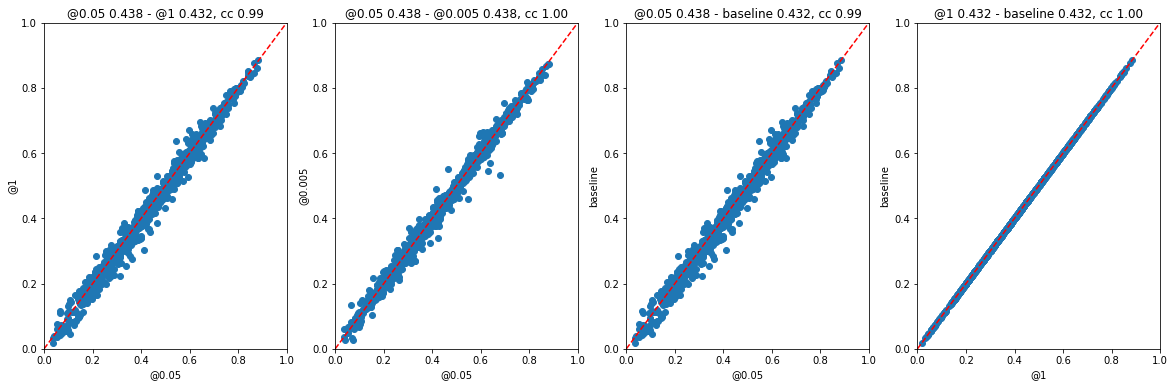

cnn_b.9_abs


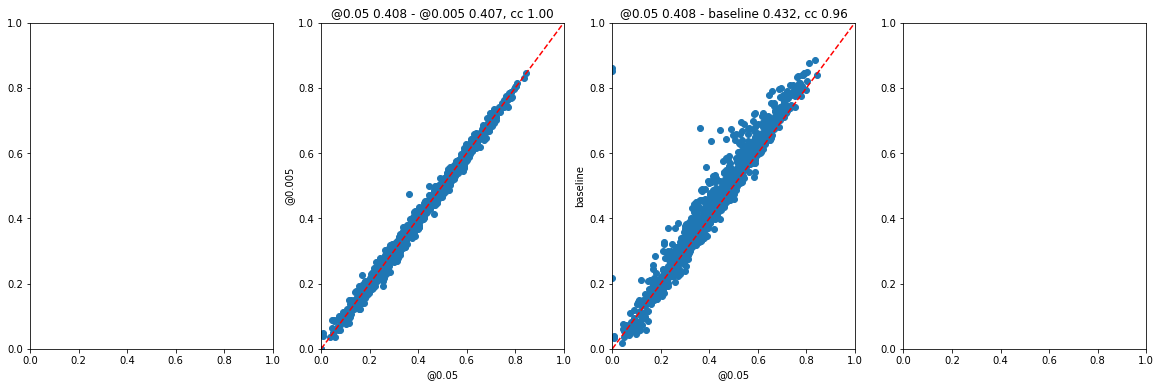

cnn_b.9_avg


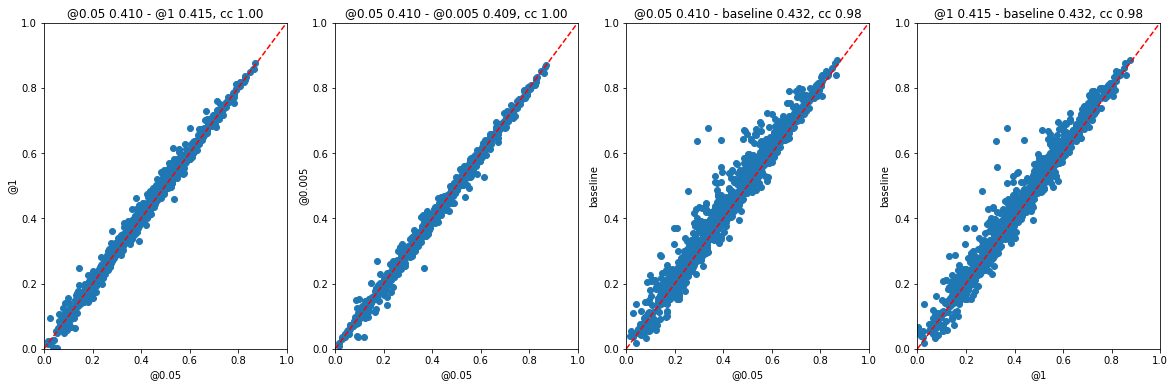

cnn_b.9_avg_abs


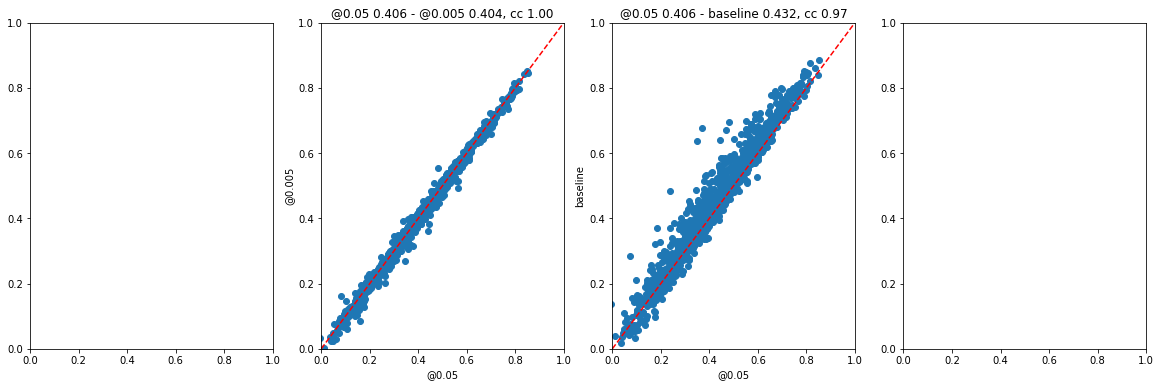

cnn_b.9_avg_halfsq


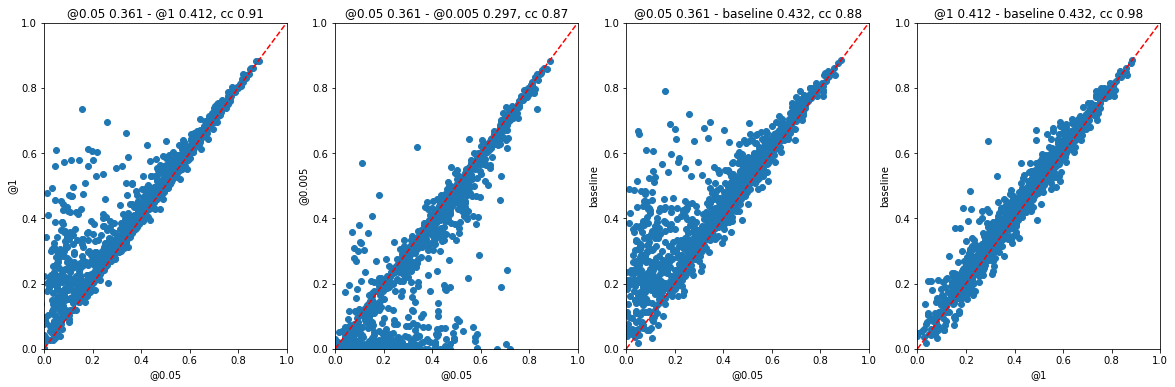

cnn_b.9_avg_linear


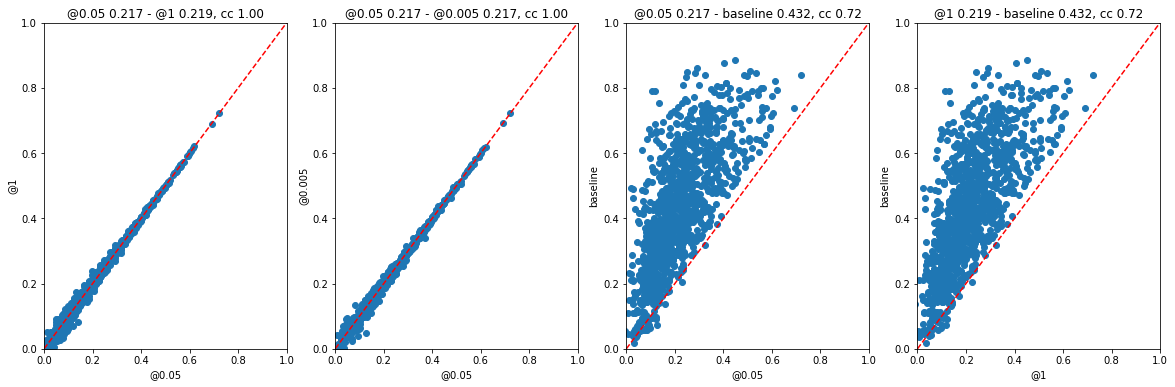

cnn_b.9_avg_sq


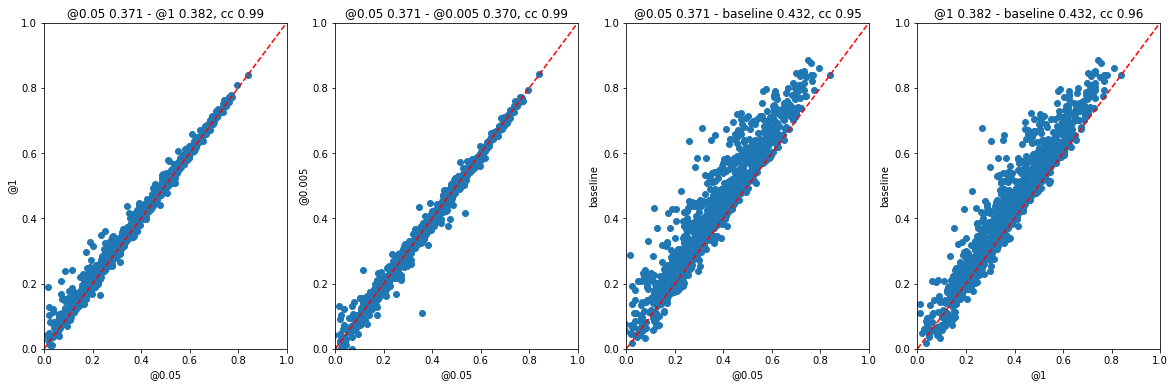

cnn_b.9_halfsq


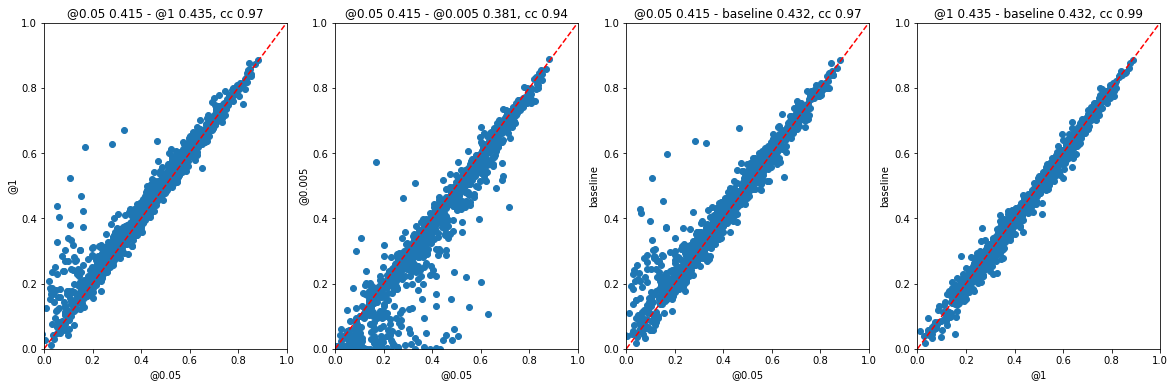

cnn_b.9_linear


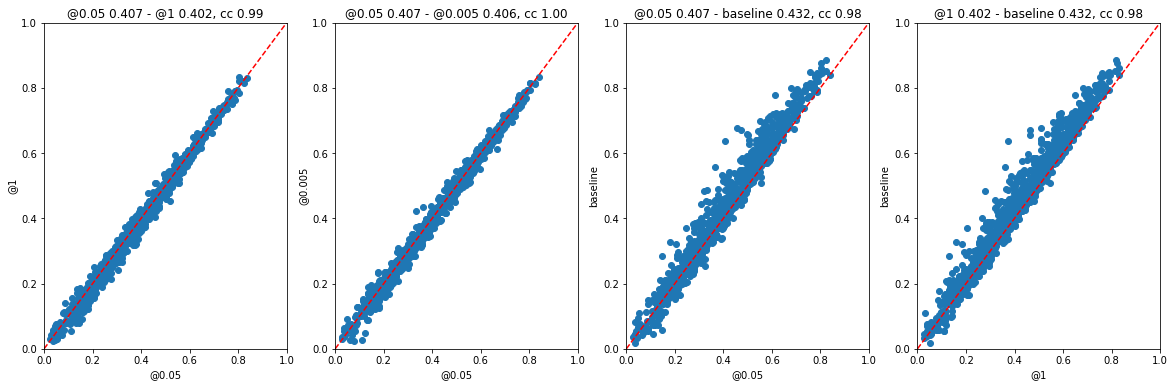

cnn_b.9_sq


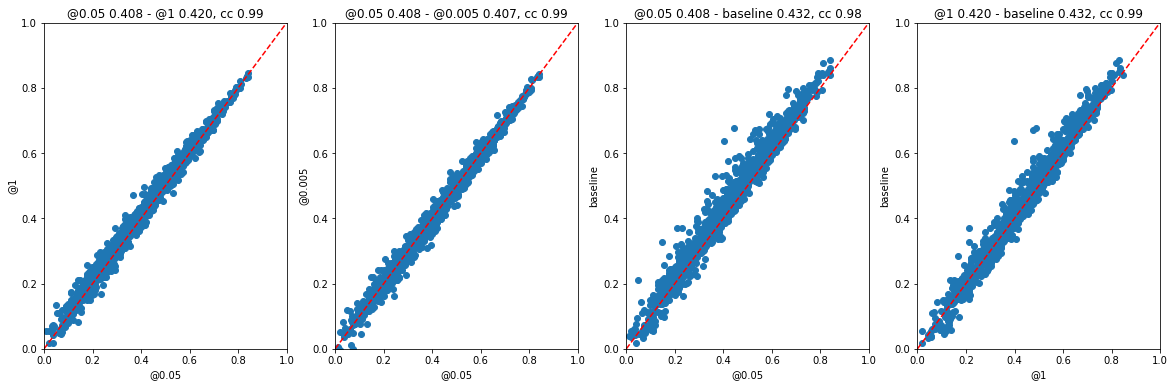

In [13]:
vis_stuff()